In [545]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:99% !important; }</style>"))

#from IPython.core.display import HTML
HTML("""
<style>

div.cell { /* Tunes the space between cells */
margin-top:1em;
margin-bottom:1em;
}

div.text_cell_render h1 { /* Main titles bigger, centered */
font-size: 2.2em;
line-height:1.4em;
text-align:center;
}

div.text_cell_render h2 { /*  Parts names nearer from text */
margin-bottom: -.4em;
}


div.text_cell_render { /* Customize text cells */
font-family: 'Times New Roman';
font-size:1.8em;
line-height:1.1em;
padding-left:0em;
padding-right:0em;
}
</style>
""")



In [546]:
def read_data_year(fname):
#    print fname
    array1 = loadtxt(fname)
    return array1.T

In [547]:
%pylab inline
import matplotlib
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from scipy import fft, arange
pylab.rcParams['figure.figsize'] = (12, 8)
matplotlib.rcParams.update({'font.size': 25,'legend.fontsize':20,'font.family': 'serif'})
#print(plt.style.available)
#style.use('dark_background')

Populating the interactive namespace from numpy and matplotlib


/Users/weiszr/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['gamma', 'beta', 'fft', 'weibull']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [548]:
def read_SLR(fname):
    array1 = loadtxt(fname)
    return array1.T

In [549]:
# nfiles = 10
# ndir=6
# year = ['1788','1813','1838']
# year = ['1838']
# year = linspace(2000,2200,21)
# nyear = len(year)
# #eq = ['80','82','84','86','88','90','92','94']
# neq = 15
# eqf = linspace(8.0,9.4,neq)


# nreali = 24
# max_val = zeros([nyear,neq,nreali])

# for i in range(nyear):
#     for j in range(neq):
#         dummy = '{test:3.2f}'.format(test=eqf[j])
#         mag_name = dummy.replace('.', '')
#         for k in range(nreali):
#             path = str('/work/dragonstooth/weiszr/SLR/run_RCP45NA_{yeara}_{eqa}_{test1:04d}/_output/gauge10010.txt'.format(yeara=int(year[i]),eqa=mag_name,test1=k))
#             local_f = 'gauge1_RCP45NA_{yeara}_{eqa}_{test1:04d}.dat'.format(yeara=int(year[i]),eqa=mag_name,test1=k)
#            # print "\t",path," -> ", local_f
#             max_val[i,j,k] = read_data(local_f)


In [678]:
def smooth(x,window_len=10,window='hanning'):
    """smooth the data using a window with requested size.
    
    This method is based on the convolution of a scaled window with the signal.
    The signal is prepared by introducing reflected copies of the signal 
    (with the window size) in both ends so that transient parts are minimized
    in the begining and end part of the output signal.
    
    input:
        x: the input signal 
        window_len: the dimension of the smoothing window
        window: the type of window from 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'
            flat window will produce a moving average smoothing.

    output:
        the smoothed signal
        
    example:

    t=linspace(-2,2,0.1)
    x=sin(t)+randn(len(t))*0.1
    y=smooth(x)
    
    see also: 
    
    numpy.hanning, numpy.hamming, numpy.bartlett, numpy.blackman, numpy.convolve
    scipy.signal.lfilter
 
    TODO: the window parameter could be the window itself if an array instead of a string   
    """

    if x.ndim != 1:
        raise ValueError, "smooth only accepts 1 dimension arrays."

    if x.size < window_len:
        raise ValueError, "Input vector needs to be bigger than window size."


    if window_len<3:
        return x


    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise ValueError, "Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'"


    s=numpy.r_[2*x[0]-x[window_len:1:-1],x,2*x[-1]-x[-1:-window_len:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=ones(window_len,'d')
    else:
        w=eval('numpy.'+window+'(window_len)')

    y=numpy.convolve(w/w.sum(),s,mode='same')
    return y[window_len-1:-window_len+1]

In [550]:
nfiles = 10
year = linspace(2000,2200,21)
nyear = len(year)
neq = 15
eqf = linspace(8.0,9.4,neq)


nreali = 24
max_val = zeros([nyear,neq,nreali])

for i in range(nyear):
    #for j in range(neq):
       # dummy = '{test:3.2f}'.format(test=eqf[j])
       # mag_name = dummy.replace('.', '')
       # for k in range(nreali):
    local_f = 'year_{yeara}.dat'.format(yeara=int(year[i]))
    max_val[i,:,:] = read_data_year(local_f)



In [680]:
print shape(max_val)
file_name_slr = 'rcp45wa.txt'
ar_45na = read_SLR(file_name_slr)
print shape(ar_45na)

(21, 15, 24)
(21,)


In [681]:
t_type = 2
x1=0
x2=15
if t_type == 1:
    y2000 = []
    y2050 = []
    y2050_a = []
    y2100 = []
    y2100_a = []
    y2150 = []
    y2150_a = []
    y2200 = []
    y2200_a = []
    
    
    xy2000 = []
    xy2050 = []
    xy2100 = []
    xy2150 = []
    xy2200 = []
    for i in range(x1,x2):
        #for j in range(nreali):
        y2000.append(mean(max_val[0,i,:]))
        xy2000.append(eqf[i])
        y2050.append(mean(max_val[5,i,:]))
        y2050_a.append(mean(max_val[0,i,:]+ar_45na[5]))
        xy2050.append(eqf[i])
        y2100.append(mean(max_val[10,i,:]))
        y2100_a.append(mean(max_val[0,i,:]+ar_45na[10]))
        xy2100.append(eqf[i])
        y2150.append(mean(max_val[15,i,:]))
        y2150_a.append(mean(max_val[0,i,:]+ar_45na[15]))
        xy2150.append(eqf[i])
        y2200.append(mean(max_val[-1,i,:]))
        y2200_a.append(mean(max_val[0,i,:]+ar_45na[-1]))
        xy2200.append(eqf[i])
        
if t_type == 2:
    y2000 = []
    y2050 = []
    y2050_a = []
    y2100 = []
    y2100_a = []
    y2150 = []
    y2150_a = []
    y2200 = []
    y2200_a = []
    
    
    xy2000 = []
    xy2050 = []
    xy2100 = []
    xy2150 = []
    xy2200 = []
    for i in range(x1,x2):
        for j in range(nreali):
            y2000.append(max_val[0,i,j])
            xy2000.append(eqf[i])
            y2050.append(max_val[5,i,j])
            y2050_a.append(max_val[0,i,j]+ar_45na[5])
            xy2050.append(eqf[i])
            y2100.append(max_val[10,i,j])
            y2100_a.append(max_val[0,i,j]+ar_45na[10])
            xy2100.append(eqf[i])
            y2150.append(max_val[15,i,j])
            y2150_a.append(max_val[0,i,j]+ar_45na[15])
            xy2150.append(eqf[i])
            y2200.append(max_val[-1,i,j])
            y2200_a.append(max_val[0,i,j]+ar_45na[-1])
            xy2200.append(eqf[i])
    
    
y2000 = array(y2000)
y2050 = array(y2050)
y2050_ = array(y2050_a)
y2100 = array(y2100)
y2100_a = array(y2100_a)
y2150 = array(y2150)
y2150_ = array(y2150_a)
y2200 = array(y2200)
y2200_a = array(y2200_a)


In [682]:
s = 1


if s ==1: 
    y2000_s = sort(y2000)
    y2050_s = sort(y2050)
    y2100_s = sort(y2100)
    y2050_a_s = sort(y2050_a)
    y2100_a_s = sort(y2100_a)
    y2150_s = sort(y2150)
    y2200_s = sort(y2200)
    y2150_a_s = sort(y2150_a)
    y2200_a_s = sort(y2200_a)
if s == 0:
    y2000_s = y2000
    y2050_s = y2050
    y2100_s = y2100
    y2050_a_s = y2050_a
    y2100_a_s = y2100_a
    y2150_s = y2150
    y2200_s = y2200
    y2150_a_s = y2150_a
    y2200_a_s = y2200_a

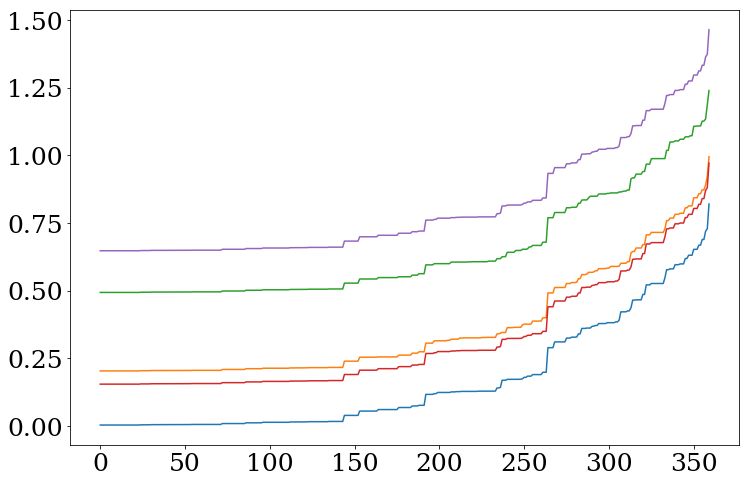

In [683]:
plot(y2000_s)
plot(y2050_s)
plot(y2100_s)
plot(y2050_a_s)
plot(y2100_a_s)
#plot(y2100.sort())

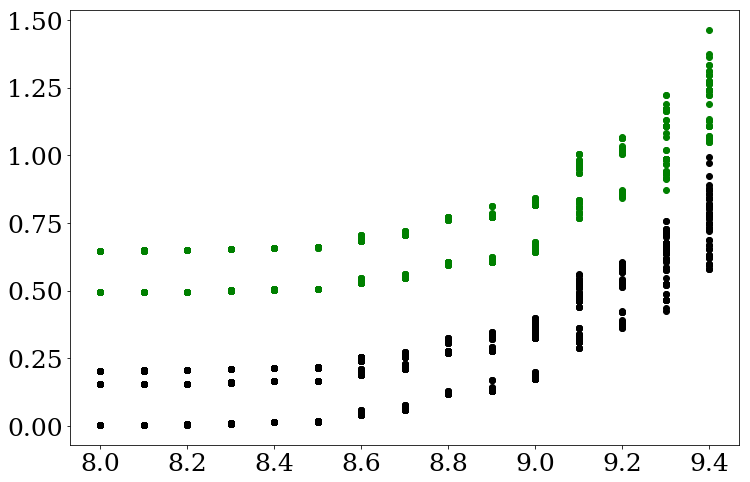

In [684]:
plot(xy2000,y2000_s,'ko')
plot(xy2050,y2050_s,'ko')
plot(xy2100,y2100_s,'go')
plot(xy2050,y2050_a_s,'ko')
plot(xy2100,y2100_a_s,'go')

In [685]:
histogram(y2000_s)

(array([192,  45,  27,  18,  25,  15,  12,  19,   6,   1]),
 array([ 0.003022 ,  0.0847098,  0.1663976,  0.2480854,  0.3297732,
         0.411461 ,  0.4931488,  0.5748366,  0.6565244,  0.7382122,  0.8199   ]))

In [686]:
from scipy import signal
from scipy import interpolate
from scipy.integrate import quad
from scipy.optimize import leastsq
from scipy import stats


In [688]:
def weibull(u,shape,scale):
    '''Weibull distribution for wind speed u with shape parameter k and scale parameter A'''
    return (shape / scale) * (u / scale)**(shape-1) * np.exp(-(u/scale)**shape)


In [744]:
from scipy.interpolate import UnivariateSpline
n=len(y2100_s)
xx=linspace(0.0,4,201)
#xx=40
p_2000, x_2000 = histogram(y2000_s, bins=xx,normed=True) # bin it into n = N/10 bins
x_2000 = x_2000[:-1] + (x_2000[1] - x_2000[0])/2   # convert bin edges to centers

p_2050, x_2050 = histogram(y2050_s, bins=xx,normed=True) # bin it into n = N/10 bins
x_2050 = x_2050[:-1] + (x_2050[1] - x_2050[0])/2 

p_2050_a, x_2050_a = histogram(y2050_a_s, bins=xx,normed=True) # bin it into n = N/10 bins
x_2050_a = x_2050_a[:-1] + (x_2050_a[1] - x_2050_a[0])/2 

p_2100, x_2100 = histogram(y2100_s, bins=xx,normed=True) # bin it into n = N/10 bins
x_2100 = x_2100[:-1] + (x_2100[1] - x_2100[0])/2   # convert bin edges to centers

p_2100_a, x_2100_a = histogram(y2100_a_s, bins=xx,normed=True) # bin it into n = N/10 bins
x_2100_a = x_2100_a[:-1] + (x_2100_a[1] - x_2100_a[0])/2   # convert bin edges to centers

p_2150, x_2150 = histogram(y2150_s, bins=xx,normed=True) # bin it into n = N/10 bins
x_2150 = x_2150[:-1] + (x_2150[1] - x_2150[0])/2 

p_2150_a, x_2150_a = histogram(y2150_a_s, bins=xx,normed=True) # bin it into n = N/10 bins
x_2150_a = x_2150_a[:-1] + (x_2150_a[1] - x_2150_a[0])/2 

p_2200, x_2200 = histogram(y2200_s, bins=xx,normed=True) # bin it into n = N/10 bins
x_2200 = x_2200[:-1] + (x_2200[1] - x_2200[0])/2   # convert bin edges to centers

p_2200_a, x_2200_a = histogram(y2200_a_s, bins=xx,normed=True) # bin it into n = N/10 bins
x_2200_a = x_2200_a[:-1] + (x_2200_a[1] - x_2200_a[0])/2   # convert bin edges to centers







#f = UnivariateSpline(x, p, s=10)
#plot(x, f(x))
#dummy = f(x)


In [745]:
def normalize(arr):
    sum_arr=sum(arr)
    arr = [_/sum_arr for _ in arr]
    arr = array(arr)
    return arr

(0, 0.4)

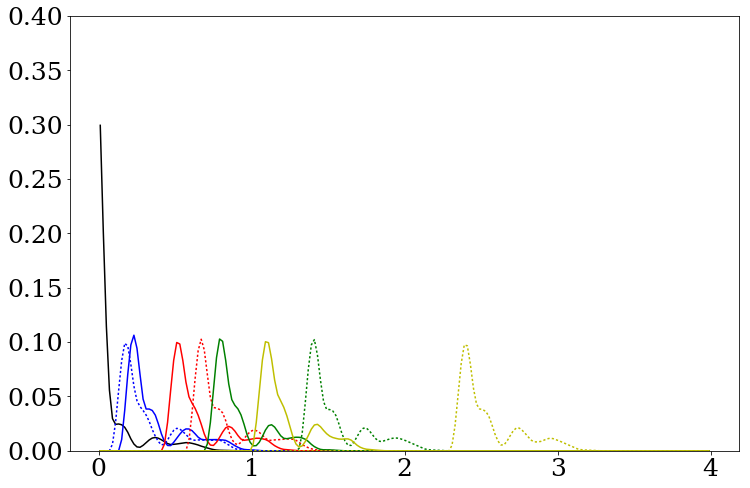

In [762]:
#print len(pdf)
#plot(pdf)
#print pdf
#dummy= check_distr(p_2200)
np_2000 = smooth(p_2000,10)

np_2050 = smooth(p_2050,10)
np_2050[np_2050<0] =0
np_2050_a = smooth(p_2050_a,10)
np_2050_a[np_2050_a<0] =0


np_2100 = smooth(p_2100,10)
np_2100[np_2100<0] =0
np_2100_a = smooth(p_2100_a,10)
np_2100_a[np_2100_a<0] =0



np_2150 = smooth(p_2150,10)
np_2150[np_2150<0] =0
np_2150_a = smooth(p_2150_a,10)
np_2150_a[np_2150_a<0] =0



np_2200 = smooth(p_2200,10)
np_2200[np_2200<0] =0
np_2200_a = smooth(p_2200_a,10)
np_2200_a[np_2200_a<0] =0


plot(x_2000,normalize(np_2000),'k-')




plot(x_2050,normalize(np_2050),'b-')
plot(x_2050,normalize(np_2050_a),'b:')

plot(x_2100,normalize(np_2100),'r-')
plot(x_2100,normalize(np_2100_a),'r:')


plot(x_2150,normalize(np_2150),'g-')
plot(x_2150,normalize(np_2150_a),'g:')


plot(x_2200,normalize(np_2200),'y-')
plot(x_2200,normalize(np_2200_a),'y:')



# plot(x_2050, smooth(normalize(p_2050_a)), 'b:')


# plot(x_2100, smooth(normalize(p_2100)), 'r-')
# plot(x_2100, smooth(normalize(p_2100_a)), 'r:')

# plot(x_2150, smooth(normalize(p_2150)), 'g-')
# plot(x_2150, smooth(normalize(p_2150_a)), 'g:')

# plot(x_2200, smooth(normalize(p_2200)), 'y-')
# plot(x_2200, smooth(normalize(p_2200_a)), 'y:')

#xlim(0,10)
ylim(0,.4)
#plot(x_2000, p_2000, 'go')
#plot(n_x, g2, 'g-', linewidth=6, alpha=.6)

In [766]:
from numpy import trapz
area = trapz(np_2150_a)
print area

50.0


(0.54088888888888886, 0.039699209876543178)
(-12.624676424819237, 0)


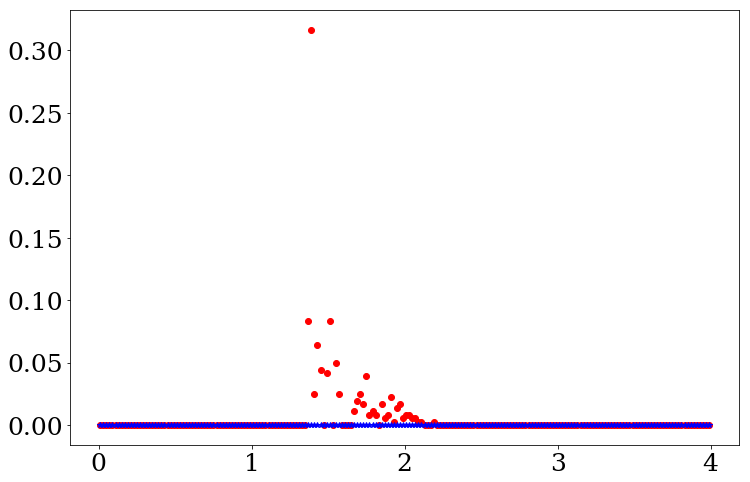

In [748]:
import math
#from scipy.misc import comb

y_axis =  p_2150_a
x_axis = x_2150
sum_ys = sum(y_axis)

sum_ys = sum(y_axis)

# normalize to 1
y_axis = [_/sum_ys for _ in y_axis]

s = 1.0 # shift by 1 to have them all at 0
m = 0.0
for k in range(0, len(x_axis)):
    m += y_axis[k] * (x_axis[k] - s)

v = 0.0
for k in range(0, len(x_axis)):
    t = (x_axis[k] - s - m)
    v += y_axis[k] * t * t

print(m, v)

p = 1.0 - m/v
r = int(m*(1.0 - p) / p)

print(p, r)

z = []
for k in range(0, len(x_axis)):
    q = comb(k + r - 1, k) * (1.0 - p)**r * p**k
    z.append(q)
plot(x_axis, y_axis, 'ro')
plot(x_axis, z, 'b*')

In [671]:
import warnings
import numpy as np
import pandas as pd
import scipy.stats as st
#import statsmodels as sm
import matplotlib
import matplotlib.pyplot as plt
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
#     DISTRIBUTIONS = [        
#         st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
#         st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
#         st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
#         st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
#         st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
#         st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,st.levy_stable,
#         st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
#         st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
#         st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
#         st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
#     ]

    DISTRIBUTIONS = [        
        st.beta,st.betaprime,st.bradford,st.cauchy,st.chi,st.chi2,st.cosine,
        st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
        st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,
        st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,st.levy_stable,
        st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
        st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
        st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
        st.uniform,st.vonmises,st.vonmises_line,st.wald,st.wrapcauchy
    ]


#     DISTRIBUTIONS = [        
        
#         st.gamma,
#         st.halfnorm,st.halfgennorm,
#         st.loggamma,
#         st.norm
#     ]


    
    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)
def make_pdf(dist, params, size=10000):
    """Generate distributions's Propbability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]
    print dist
    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

In [670]:
def check_distr(arr):
    nx = len(arr)
    if arr[0]==0.0 and arr[1]==0.0:
        for i in range(1,nx):
            if arr[i]!=0.0:
                index_beg=i
                break
    if arr[-1]==0.0 and arr[-2]==0.0:
        for i in reversed(range(0,nx-2)):
            if arr[i]!=0.0:
                index_end=i
                break
    print index_beg,index_end
    for i in range(index_beg,index_end):
        if arr[i] == 0.0:
            arr[i] = arr[i-1]
    return arr

In [672]:
best_fit_name, best_fir_paramms = best_fit_distribution(y2100_a, 8)
best_dist = getattr(st, best_fit_name)
print best_dist
pdf = make_pdf(best_dist, best_fir_paramms)
print shape(pdf)
# #params = fit(y2100_a_s)
# param = beta.fit(y2100_s)
# param1 = beta.fit(y2100_s)
# print shape1, loc1, scale1
# g1 = lognorm.pdf(n_x, *param[:-2], loc=param[-2], scale=param[-1])
# g3 = lognorm.pdf(n_x, param[0], param[1], param[2])
param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fir_paramms)])
dist_str = '{}({})'.format(best_fit_name, param_str)
print dist_str

(10000,)
lomax(c=2.64, loc=0.65, scale=0.25)


In [669]:
from scipy.stats import gamma,lognorm,beta
def fit(self, data, *args, **kwds):
    floc = kwds.get('floc', None)
    if floc == 0:
        xbar = ravel(data).mean()
        logx_bar = ravel(log(data)).mean()
        s = log(xbar) - logx_bar
        def func(a):
            return log(a) - special.digamma(a) - s
        aest = (3-s + math.sqrt((s-3)**2 + 24*s)) / (12*s)
        xa = aest*(1-0.4)
        xb = aest*(1+0.4)
        a = optimize.brentq(func, xa, xb, disp=0)
        scale = xbar / a
        return a, floc, scale
    else:
        return super(gamma_gen, self).fit(data, *args, **kwds)

In [668]:
# for i in range(nyear):
#     fname="year_{year}.dat".format(year=str(int(year[i])))
#     print fname
#     outfile=open(fname,'w')
#     savetxt(outfile, max_val[i,:,:].T,fmt='%6.3e')
#     outfile.close()


    #     for j in range(neq):
#         dummy = '{test:3.2f}'.format(test=eqf[j])
#         mag_name = dummy.replace('.', '')
#         for k in range(nreali):

In [667]:
year[10]

2100.0

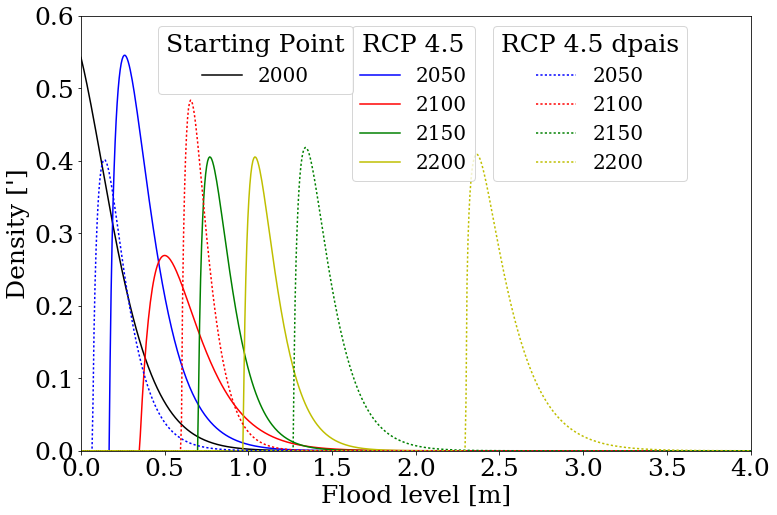

In [666]:
import scipy.stats as stats
#fit_alpha, fit_loc, fit_beta=stats.gamma.fit(y2100_s)
param = stats.gamma.fit(y2100_s, floc=0)
n_x=linspace(0,6.0,1000)


mm_2000=sum(p_2000)
param_2000 = [7.0, -0.640,0.09]
pdf_fitted = stats.gamma.pdf(n_x, *param_2000)
p1, = plot(n_x, pdf_fitted/3., color='k',label="2000")



mm_2050=sum(p_2050)
param_2050 = [1.7, 0.17,0.13]
pdf_fitted = stats.gamma.pdf(n_x, *param_2050)
p2, =plot(n_x, pdf_fitted/6., color='b',label="2050")

param_2100 = [2, 0.35,0.15]
pdf_fitted = stats.gamma.pdf(n_x, *param_2100)
mm_2100=sum(p_2100)
p3, =plot(n_x, pdf_fitted/9.1, color='r',label="2100")

mm_2150=sum(p_2150)
param_2150 = [1.7, 0.7,0.1]
pdf_fitted = stats.gamma.pdf(n_x, *param_2150)
p4, =plot(n_x, pdf_fitted/10.5, color='g',label="2150")

param_2200 = [1.7, 0.97,0.10]
pdf_fitted = stats.gamma.pdf(n_x, *param_2200)
mm_2200=sum(p_2200)
p5, =plot(n_x, pdf_fitted/10.5, color='y',label="2200")

mm_2050_a=sum(p_2050_a)
param_2050_a = [1.7, 0.07,0.1]
pdf_fitted = stats.gamma.pdf(n_x, *param_2050_a)
p2a, =plot(n_x, pdf_fitted/10.6, 'b:',label="2050")


mm_2100_a=sum(p_2100_a)
param_2100_a = [1.7, 0.6,0.08]
pdf_fitted = stats.gamma.pdf(n_x, *param_2100_a)
p3a, =plot(n_x, pdf_fitted/11, 'r:',label="2100")






mm_2150_a=sum(p_2150_a)
param_2150_a = [1.6, 1.27,0.12]
pdf_fitted = stats.gamma.pdf(n_x, *param_2150_a)
p4a, =plot(n_x, pdf_fitted/9, 'g:',label="2150")

mm_2200_a=sum(p_2200_a)
param_2200 = [1.4, 2.3,0.16]
pdf_fitted = stats.gamma.pdf(n_x, *param_2200)
p5a, =plot(n_x, pdf_fitted/8., 'y:',label="2200")


p7, = plot([0],  marker='None',
           linestyle='None', label='dummy-empty')

first_legend = legend(handles=[p2,p3,p4,p5],title="RCP 4.5", loc='upper left',bbox_to_anchor=(0.39,1.0), fancybox=True)
second_legend = legend(handles=[p1],title="Starting Point", loc='upper left',bbox_to_anchor=(0.1,1.0), fancybox=True)
third_legend = legend(handles=[p2a,p3a,p4a,p5a],title="RCP 4.5 dpais", loc='upper left',bbox_to_anchor=(0.6,1.0), fancybox=True)

# Add the legends manually to the current Axes.
ax = plt.gca().add_artist(first_legend)
ax = plt.gca().add_artist(second_legend)

#legend(title="Legend",loc='upper left', bbox_to_anchor=(-0.1,1.15), fancybox=True, shadow=False, ncol=4, numpoints=1)

# plot the histogram
# plot(x_2100, p_2100/mm_2100, 'ro')
#plot(x_2050, p_2050/mm_2050, 'go')
#plot(x_2050_a, p_2050_a/mm_2050_a, 'bo')
#plot(x_2200_a, p_2200_a/mm_2200_a, 'ro')
#plot(x_2150, p_2150/mm_2150, 'bo')
#plot(x_2200, p_2200/mm_2200, 'ko')
# plot(x_2000, p_2000/mm_2000, 'ko')
xlim(0,4)
ylim(-0.,0.6)
xlabel("Flood level [m]",size=25)
ylabel("Density [']",size=25)
savefig('flood_level_prob.png',dpi=501, bbox_inches="tight")

In [665]:
eqf[8]
from scipy.stats import skewnorm